## Title :
Exercise: Beta Values for Data from Random Universe

## Description :

Given a `RandomUniverse(dataframe)->dataframe` function that gives a new dataset from a "parallel" universe, calculate the $\beta_0$'s and $\beta_1$'s and plot a histogram like the one below.

<img src="../fig/fig1.png" style="width: 500px;">

## Data Description:

## Instructions:

- Get a new dataframe using the RandomUniverse function already provided in the exercise
- Calculate $\beta_0$, $\beta_1$ for that particular dataframe
- Add the calculated $\beta_0$ and $\beta_1$ values to a python list
- Plot a histogram using the lists calculated above

## Hints: 

$${\widehat {\beta_1 }}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}$$

$${\widehat {\beta_0 }}={\bar {y}}-{\widehat {\beta_1 }}\,{\bar {x}}$$

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a>
Create a figure and a set of subplots

<a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html" target="_blank">ax.hist()</a>
Plot a histogram from a list or series.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline


In [2]:
# Read the advertising dataset as a pandas dataframe
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the dataframe
df.head()


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [10]:
# Create two empty lists that will store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate 
# that many new versions of the dataset
parallelUniverses = 10000

# Loop over the maximum number of parallel Universes
for i in range(parallelUniverses):

    # Call the RandomUniverse helper function with the dataframe
    # read from the data file
    df_new = RandomUniverse(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new.tv.mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new.sales.mean()

    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = np.sum((df_new.tv-xmean) * (df_new.sales-ymean)) / np.sum((df_new.tv-xmean)**2)
    beta0 = ymean-beta1*xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)


In [11]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)


Text(0, 0.5, 'Frequency')

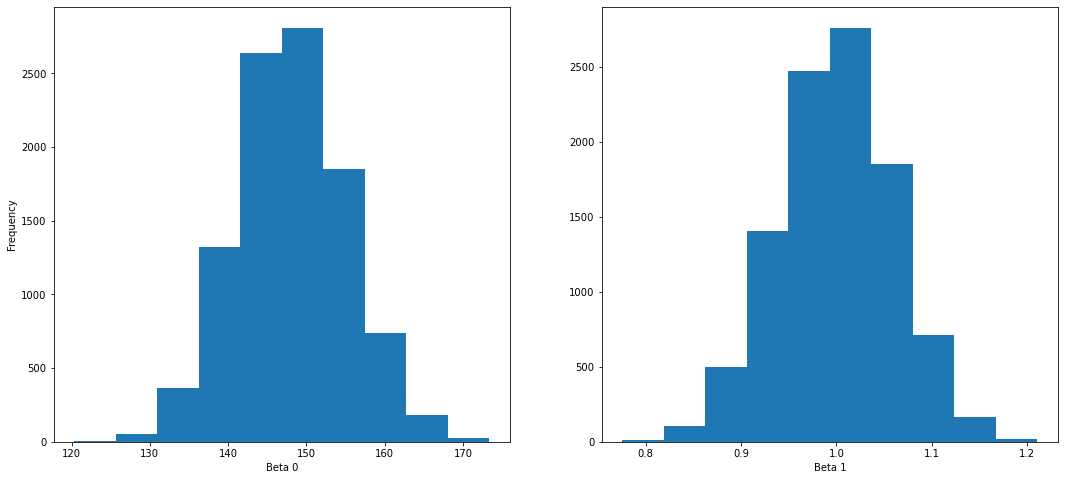

In [12]:
# Plot histograms of beta_0 and beta_1 using lists created above 
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');


#### ⏸ Increase the number of `parallelUniverses`. Which of the following do you observe?

#### A. The spread increases
#### B. The frequency of points decreases
#### C. The spread decreases
#### D. There is no change

In [13]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
# (Eg. if you choose option C, put 'C')
answer1 = 'D'
